# Regression Application

Predicting song popularity

#### Group 15 - Clare Garberg - cag199
#### Group 15 - Kajal Tiwary - kt755
#### Group 15 - Nina Thomas - cat122

In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import os
import pickle
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import numpy as np
from pathlib import Path

In [2]:
## Show the first six records in the data frame 
os.chdir('/Users/claregarberg/Documents/Graduate_School/Fall_2022_Semester/ANLY605_Machine_Learning/Project/regression_application/')
filename = 'app/data/final_dataframe_regression.csv'
df = pd.read_csv(filename)
df.head(6)

,ms_played,frequency,release_date,acousticness,danceability,energy,key,instrumentalness,liveness,loudness,mode,speechiness,valence,tempo,time_signature,popularity
0,253346,37.0,2016,0.3080,0.529,0.894,2.0,0.000005,0.2540,-3.599,1.0,0.0412,0.543,108.024,4.0,67.0
1,224910,8.0,2019,0.0608,0.876,0.662,2.0,0.000000,0.1270,-6.482,0.0,0.4260,0.844,75.445,4.0,72.0
2,268400,61.0,2018,0.0859,0.805,0.833,1.0,0.000000,0.0578,-6.730,0.0,0.1200,0.703,109.076,4.0,60.0
3,287360,5.0,2015,0.3590,0.509,0.787,7.0,0.000028,0.2600,-6.754,1.0,0.2650,0.507,114.449,4.0,68.0
4,149079,14.0,2014,0.3570,0.684,0.585,2.0,0.000001,0.7280,-7.601,1.0,0.0712,0.335,148.507,4.0,54.0
5,192315,169.0,2020,0.0900,0.710,0.618,11.0,0.000039,0.1410,-8.865,0.0,0.0598,0.797,94.995,4.0,48.0


In [3]:
df.describe()

,ms_played,frequency,release_date,acousticness,danceability,energy,key,instrumentalness,liveness,loudness,mode,speechiness,valence,tempo,time_signature,popularity
count,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000,25563.000000
mean,193976.895122,44.567265,2016.245433,0.201374,0.638121,0.655175,5.229472,0.010179,0.173389,-6.440869,0.598873,0.077087,0.542445,120.772493,3.962759,68.257716
std,62533.624105,50.133995,9.908853,0.230789,0.126481,0.145416,3.809904,0.059645,0.124195,2.257651,0.490136,0.068633,0.223778,28.306535,0.244855,12.646426
min,45010.000000,3.000000,1959.000000,0.000062,0.128000,0.084700,0.000000,0.000000,0.026400,-19.197000,0.000000,0.023500,0.038100,57.860000,1.000000,17.000000
25%,164441.000000,12.000000,2016.000000,0.028100,0.554000,0.570000,1.000000,0.000000,0.093900,-7.754000,0.000000,0.037700,0.355500,99.729000,4.000000,61.000000
50%,198453.000000,27.000000,2020.000000,0.101000,0.640000,0.664000,5.000000,0.000004,0.123000,-6.124000,1.000000,0.052000,0.550000,115.982000,4.000000,68.000000
75%,226733.000000,60.000000,2021.000000,0.301000,0.730000,0.756000,9.000000,0.000221,0.219000,-4.869000,1.000000,0.089100,0.719000,142.058000,4.000000,78.000000
max,731350.000000,276.000000,2022.000000,0.968000,0.949000,0.989000,11.000000,0.910000,0.976000,-1.538000,1.000000,0.463000,0.985000,205.272000,5.000000,96.000000


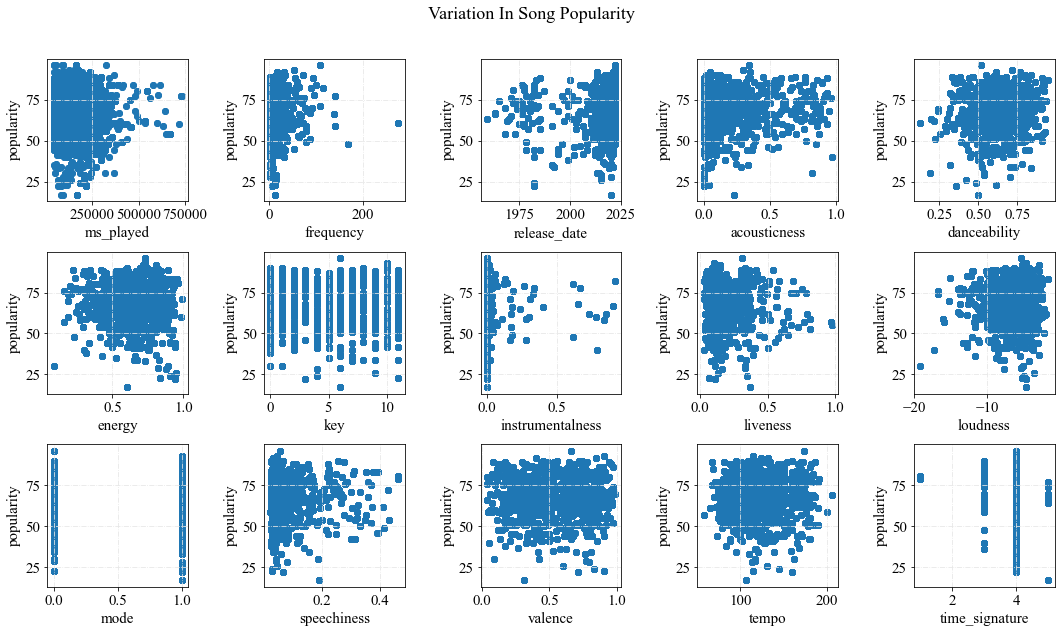

In [31]:
plt.figure(figsize=(15, 9))

features = df.columns[:-1]
target = df['popularity']

for i, col in enumerate(features):
    plt.subplot(3, 5, i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    #plt.title("Variation In Song Popularity",loc="Left")
    plt.xlabel(col)
    plt.ylabel('popularity')
    plt.tight_layout()
plt.suptitle('Variation In Song Popularity')
plt.subplots_adjust(top=0.90)
plt.savefig('app/static/baseimage.jpg')

/Users/claregarberg/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

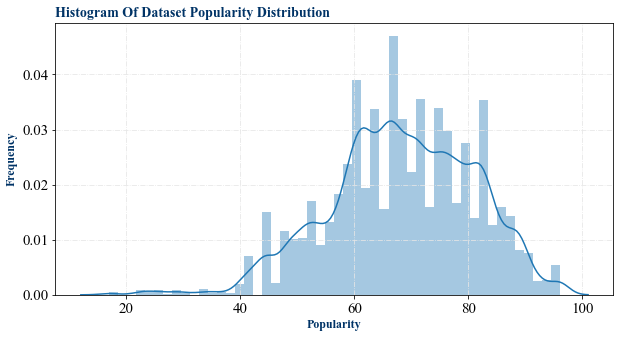

In [6]:
## histogram of output variable
rc = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.9',
      'grid.linestyle':'-.',
      'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc)
sns.distplot(df['popularity'])
plt.title("Histogram Of Dataset Popularity Distribution", loc='left', fontsize=14,fontweight='bold',color='#003366')
plt.xlabel("Popularity", fontsize=12,fontweight='bold',color='#003366')
plt.ylabel("Frequency", fontsize=12,fontweight='bold',color='#003366')
#plt.savefig('label_distribution.jpg',dpi=300)

In [7]:
# Load from file
pkl_filename = "app/TrainedModel/StackedPickle_Regression.pkl"
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [37]:
# plotting graphs for application
def plot_graphs(model, new_input_arr, output_file):
    filename = 'app/data/final_dataframe_regression.csv'
    df = pd.read_csv(filename)
    
    # creating subplots in loop
    plt.figure(figsize=(15, 9))

    features = df.columns[:-1]
    target = df['popularity']
    
    new_preds = model.predict(new_input_arr)

    for i, col in enumerate(features):
        
        feature_input = np.array(new_input_arr[0][i])
        
        plt.subplot(3, 5, i+1)
        x = df[col]
        y = target
        plt.scatter(x, y, marker='o')
        plt.plot(feature_input, new_preds, marker='*', color='yellow', ms=20)
        #plt.title("Variation In Song Popularity",loc="Left")
        plt.xlabel(col)
        plt.ylabel('popularity')
        plt.tight_layout()
    
    plt.suptitle('Variation In Song Popularity')
    plt.subplots_adjust(top=0.90)
    plt.savefig(output_file)
    #plt.show()

    new_preds_out = round(new_preds[0], 2)
    return new_preds_out

72.15

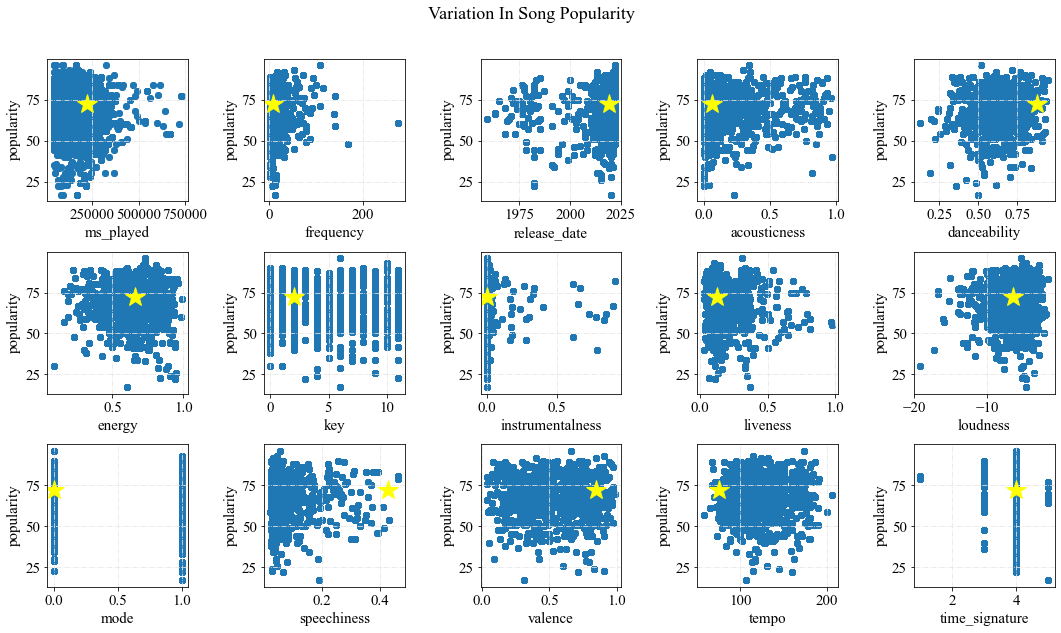

In [38]:
# getting test value without popularity
testvalue = df.loc[1][:-1].values.reshape(1, -1)

# running through model, getting predictions, and plotting
plot_graphs(pickle_model,new_input_arr=testvalue,output_file="app/static/scatterplots.jpg")

In [34]:
def floatsome_to_np_array(floats_str):
    def is_float(s):
        try:
            float(s)
            return True
        except:
            return False
    floats = np.array([float(x) for x in floats_str.split(',') if is_float(x)])
    return floats.reshape(len(floats), 1)

floatsome_to_np_array("1, 222, 3, 6, 4, ").reshape(1, -1)

array([[  1., 222.,   3.,   6.,   4.]])

In [35]:
print(testvalue)

[[ 2.2491e+05  8.0000e+00  2.0190e+03  6.0800e-02  8.7600e-01  6.6200e-01
   2.0000e+00  0.0000e+00  1.2700e-01 -6.4820e+00  0.0000e+00  4.2600e-01
   8.4400e-01  7.5445e+01  4.0000e+00]]


In [36]:
with np.printoptions(precision=10):
    print(testvalue)

[[ 2.2491e+05  8.0000e+00  2.0190e+03  6.0800e-02  8.7600e-01  6.6200e-01
   2.0000e+00  0.0000e+00  1.2700e-01 -6.4820e+00  0.0000e+00  4.2600e-01
   8.4400e-01  7.5445e+01  4.0000e+00]]
